# 비지도 학습 예제 1
### Kaggle의  "Mall Customers Dataset"을 사용하여 K-Means 알고리즘을 이용해 클러스터링 합니다.
### 클러스트링 한 후 각 클러스트링 별 데이터 출력
### 각 클러스트별 기초 통계 지표를 출력하세요.

In [75]:
# 필요한 라이브러리 호출
import pandas as pd # csv불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [76]:
# 1. 데이터 생성
data = pd.read_csv('Mall_Customers.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [87]:
# 데이터 전처리
# CustomerID 컬럼은 그저 순서이므로 삭제
data = data.drop('CustomerID', axis=1)

In [90]:
print(data.shape)
print(data.info())

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 7.2+ KB
None


In [91]:
# 데이터 정규화
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
sclaer = StandardScaler()
scaled_features = sclaer.fit_transform(features)

In [92]:
# K-Means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [93]:
data['Cluster'] = kmeans.labels_

In [94]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


In [95]:
kmeans.cluster_centers_[:, 0]

array([-0.20091257,  0.99158305, -1.32954532,  1.05500302, -1.30751869])

In [96]:
scaled_features[:, 0]

array([-1.73899919, -1.73899919, -1.70082976, -1.70082976, -1.66266033,
       -1.66266033, -1.62449091, -1.62449091, -1.58632148, -1.58632148,
       -1.58632148, -1.58632148, -1.54815205, -1.54815205, -1.54815205,
       -1.54815205, -1.50998262, -1.50998262, -1.43364376, -1.43364376,
       -1.39547433, -1.39547433, -1.3573049 , -1.3573049 , -1.24279661,
       -1.24279661, -1.24279661, -1.24279661, -1.20462718, -1.20462718,
       -1.16645776, -1.16645776, -1.05194947, -1.05194947, -1.05194947,
       -1.05194947, -1.01378004, -1.01378004, -0.89927175, -0.89927175,
       -0.86110232, -0.86110232, -0.82293289, -0.82293289, -0.82293289,
       -0.82293289, -0.78476346, -0.78476346, -0.78476346, -0.78476346,
       -0.70842461, -0.70842461, -0.67025518, -0.67025518, -0.67025518,
       -0.67025518, -0.63208575, -0.63208575, -0.55574689, -0.55574689,
       -0.55574689, -0.55574689, -0.51757746, -0.51757746, -0.47940803,
       -0.47940803, -0.47940803, -0.47940803, -0.47940803, -0.47

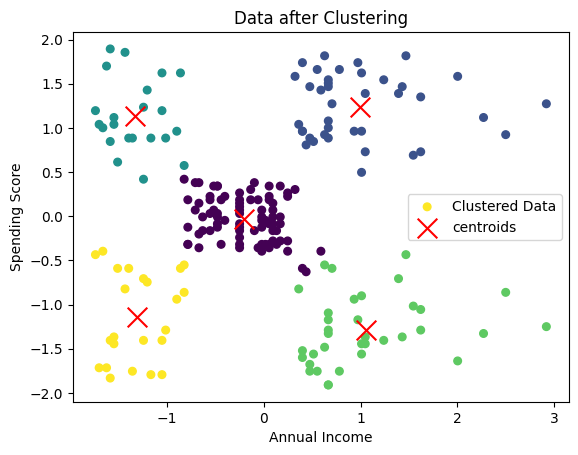

In [97]:
# 시각화
plt.scatter(scaled_features[:, 0], scaled_features[:, 1],
            c=data['Cluster'], cmap='viridis', s=30, label='Clustered Data')
# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='centroids', marker='x')
plt.title('Data after Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [98]:
# 각 클러스터의 기초 통계값 확인
cluster_stats = data.groupby('Cluster').describe()
print(cluster_stats)

          Age                                                        \
        count       mean        std   min    25%   50%    75%   max   
Cluster                                                               
0        81.0  42.716049  16.447822  18.0  27.00  46.0  54.00  70.0   
1        39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
2        22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   
3        35.0  41.114286  11.341676  19.0  34.00  42.0  47.50  59.0   
4        23.0  45.217391  13.228607  19.0  35.50  46.0  53.50  67.0   

        Annual Income (k$)             ...                \
                     count       mean  ...    75%    max   
Cluster                                ...                 
0                     81.0  55.296296  ...  62.00   76.0   
1                     39.0  86.538462  ...  95.00  137.0   
2                     22.0  25.727273  ...  32.25   39.0   
3                     35.0  88.200000  ...  97.50  137.0   
4          